<a href="https://colab.research.google.com/github/HaruEikyou/AI-AlFer/blob/main/neural_network/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download DataSet Daun Herbal
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Ws26KbI8SE-JcOtGlw0fkHBHtF1JG4gr' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Ws26KbI8SE-JcOtGlw0fkHBHtF1JG4gr" -O /tmp/leaf.zip && rm -rf /tmp/cookies.txt

--2021-11-16 14:21:35--  https://docs.google.com/uc?export=download&confirm=&id=1Ws26KbI8SE-JcOtGlw0fkHBHtF1JG4gr
Resolving docs.google.com (docs.google.com)... 172.217.164.142, 2607:f8b0:4004:814::200e
Connecting to docs.google.com (docs.google.com)|172.217.164.142|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-38-docs.googleusercontent.com/docs/securesc/a620obt478dlhfak61qrvq59d6f9ff7r/970bkegagv5oeg1lcjoli3jol8nfsuvp/1637072475000/17328485340708537155/14030466304323568138Z/1Ws26KbI8SE-JcOtGlw0fkHBHtF1JG4gr?e=download [following]
--2021-11-16 14:21:40--  https://doc-08-38-docs.googleusercontent.com/docs/securesc/a620obt478dlhfak61qrvq59d6f9ff7r/970bkegagv5oeg1lcjoli3jol8nfsuvp/1637072475000/17328485340708537155/14030466304323568138Z/1Ws26KbI8SE-JcOtGlw0fkHBHtF1JG4gr?e=download
Resolving doc-08-38-docs.googleusercontent.com (doc-08-38-docs.googleusercontent.com)... 142.250.73.193, 2607:f8b0:4004:829::2001
Connecting to doc-08-

In [2]:
import os
import zipfile

local_zip = '/tmp/leaf.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
base_dir = '/tmp/leaf'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_daun_sirih_dir = os.path.join(train_dir, 'daun_sirih')
train_daun_belimbing_wuluh_dir = os.path.join(train_dir, 'daun_belimbing_wuluh')

validation_daun_sirih_dir = os.path.join(validation_dir, 'daun_sirih')
validation_daun_belimbing_wuluh_dir = os.path.join(validation_dir, 'daun_belimbing_wuluh')

In [5]:
# Cek penamaan image yang ada di folder train_cats_dir dan train_dogs_dir
print(os.listdir(train_daun_sirih_dir)[:10])
print(os.listdir(train_daun_belimbing_wuluh_dir)[:10])

['sirih-017.jpg', 'sirih-013.jpg', 'sirih-027.jpg', 'sirih-028.jpg', 'sirih-009.jpg', 'sirih-018.jpg', 'sirih-024.jpg', 'sirih-035.jpg', 'sirih-010.jpg', 'sirih-015.jpg']
['belimbing wuluh-024.jpg', 'belimbing wuluh-011.jpg', 'belimbing wuluh-008.jpg', 'belimbing wuluh-018.jpg', 'belimbing wuluh-026.jpg', 'belimbing wuluh-021.jpg', 'belimbing wuluh-019.jpg', 'belimbing wuluh-030.jpg', 'belimbing wuluh-025.jpg', 'belimbing wuluh-031.jpg']


In [6]:
# Cek jumlah data train dan data validation
print('total training daun sirih images:', len(os.listdir(train_daun_sirih_dir)))
print('total training daun belimbing wuluh images:', len(os.listdir(train_daun_belimbing_wuluh_dir)))
print('total validation daun sirih images:', len(os.listdir(validation_daun_sirih_dir)))
print('total validation daun belimbing wuluh images:', len(os.listdir(validation_daun_belimbing_wuluh_dir)))

total training daun sirih images: 35
total training daun belimbing wuluh images: 35
total validation daun sirih images: 15
total validation daun belimbing wuluh images: 15


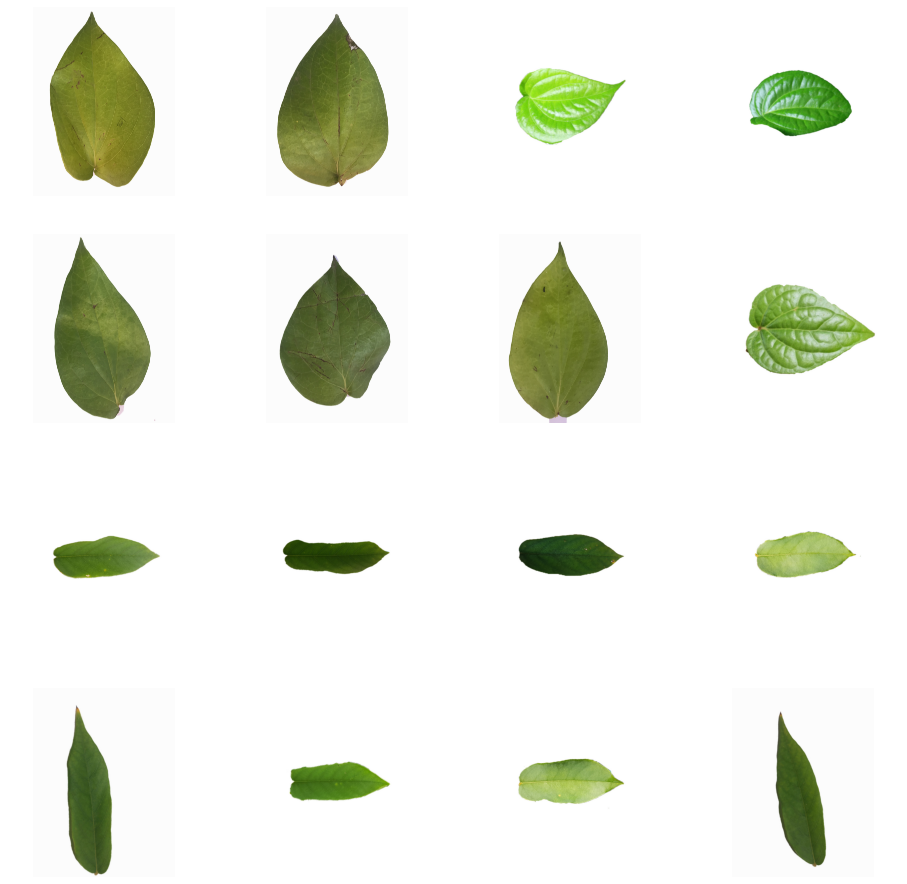

In [7]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_daun_sirih_pix = [os.path.join(train_daun_sirih_dir, fname) 
                for fname in os.listdir(train_daun_sirih_dir)[pic_index-8:pic_index]]
next_daun_belimbing_wuluh_pix = [os.path.join(train_daun_belimbing_wuluh_dir, fname) 
                for fname in os.listdir(train_daun_belimbing_wuluh_dir)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_daun_sirih_pix+next_daun_belimbing_wuluh_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [8]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [9]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

<h3>Data Preprocessing</h3>

In [10]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (70, 150, 150, 3)
Train Label =  (70,)
Validation Data =  (30, 150, 150, 3)
Validation Label =  (30,)


In [11]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [255 255 255]
Data setelah di-normalisasi  [1. 1. 1.]


In [12]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[30:40])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[30:40])

Label sebelum di-encoder  ['daun_belimbing_wuluh' 'daun_belimbing_wuluh' 'daun_belimbing_wuluh'
 'daun_belimbing_wuluh' 'daun_belimbing_wuluh' 'daun_sirih' 'daun_sirih'
 'daun_sirih' 'daun_sirih' 'daun_sirih']
Label setelah di-encoder  [0 0 0 0 0 1 1 1 1 1]


<h3>Definisikan Model</h3>

In [13]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [14]:
# Buat model dengan 1 input layer, 1 hidden layer, dan 1 output layer
img_input = layers.Input(shape=(150, 150, 3)) # layer input
x = layers.Flatten()(img_input) # ubah dari matriks 150x150x3 menjadi vektor
x = layers.Dense(128, activation='relu')(x) # hidden layer 1 dengan 128 neuron
output = layers.Dense(1, activation='sigmoid')(x) # output layer dengan 1 neuron (binary)

# Definisikan modelnya
model = Model(img_input, output)

In [15]:
# Tampilkan model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 128)               8640128   
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 8,640,257
Trainable params: 8,640,257
Non-trainable params: 0
_________________________________________________________________


In [16]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [17]:
H = model.fit(x_train, y_train, batch_size=20, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
4/4 [==============================] - 1s 110ms/step - loss: 57.8879 - acc: 0.4143 - val_loss: 29.7189 - val_acc: 0.5000
Epoch 2/50
4/4 [==============================] - 0s 57ms/step - loss: 34.0810 - acc: 0.5000 - val_loss: 28.2736 - val_acc: 0.5000
Epoch 3/50
4/4 [==============================] - 0s 55ms/step - loss: 23.4589 - acc: 0.5000 - val_loss: 7.9215 - val_acc: 0.5000
Epoch 4/50
4/4 [==============================] - 0s 55ms/step - loss: 3.5696 - acc: 0.5286 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 5/50
4/4 [==============================] - 0s 61ms/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 6/50
4/4 [==============================] - 0s 56ms/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 7/50
4/4 [==============================] - 0s 53ms/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 8/50
4/4 [==============================] - 0s 56ms/step - loss: 0.6932 - acc: 0.5000

<h3>Evaluasi Model</h3>

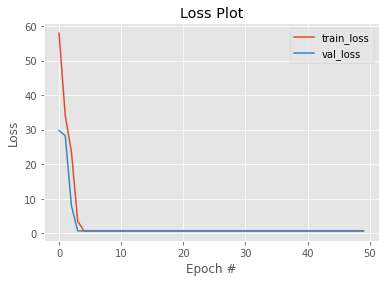

In [18]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

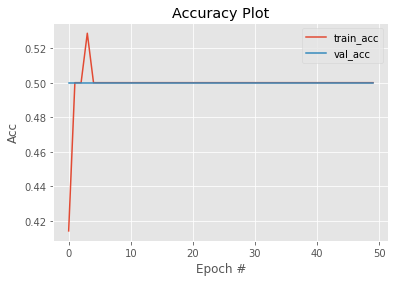

In [19]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67        15
           1       0.00      0.00      0.00        15

    accuracy                           0.50        30
   macro avg       0.25      0.50      0.33        30
weighted avg       0.25      0.50      0.33        30



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
